In [1]:
import numpy as np
import pandas as pd
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data0 = gpd.read_file("alltrips.shp")
data0.head()

,OBJECTID,id,o_time,d_time,o_lat,o_lng,d_lat,d_lng,escooter_d,escooter_t,transit_ti,transit_to,transit_wa,transit_tr,car_time,car_distan,walkTime_y,walkDistan,type,geometry
0,1,083ccd65-c2e4-4563-bcc1-856eff93c91c,2021-12-28 00:00:23,2021-12-28 00:06:24,59.342388,18.038866,59.343147,18.049500,608.781895,361.0,0.0,512.0,638.134534,0.000000,503.0,2794.444444,512.0,638.134534,vio,POINT (18.03887 59.34239)
1,2,321399c3-07e4-43b6-b191-66660e9b5d50,2021-12-28 00:03:23,2021-12-28 00:45:31,59.330967,18.066385,59.337105,18.067427,685.049246,2528.0,0.0,634.0,799.175639,0.000000,265.0,1472.222222,634.0,799.175639,vio,POINT (18.06639 59.33097)
2,3,415b85b8-a204-4927-9428-c5ef4974b519,2021-12-28 00:03:23,2021-12-28 00:09:25,59.289757,18.001770,59.293118,18.000690,378.693303,362.0,0.0,367.0,472.829030,0.000000,84.0,466.666667,367.0,472.829030,vio,POINT (18.00177 59.28976)
3,4,f023d35f-69f0-4590-86a4-ac54b5f0ed36,2021-12-28 00:03:23,2021-12-28 00:09:25,59.340755,18.051201,59.339394,18.037411,796.469466,362.0,0.0,776.0,935.458195,0.000000,0.0,0.000000,776.0,935.458195,vio,POINT (18.05120 59.34076)
4,5,817c9e60-3748-4ff3-8715-fdfebd21beac,2021-12-28 00:03:23,2021-12-28 00:15:26,59.316242,18.033791,59.304459,18.029894,1328.809990,723.0,240.0,1672.0,690.549383,1066.666667,707.0,3927.777778,1375.0,1684.796135,vio,POINT (18.03379 59.31624)


In [3]:
data0['o_time'] = pd.to_datetime(data0['o_time'], errors='coerce')
data0['d_time'] = pd.to_datetime(data0['d_time'], errors='coerce')
data0 = data0.sort_values(by=["o_time"]).reset_index(drop=True)
# data0['usetime'] = data0['d_time'] - data0['o_time']
# data0['usetime'] = data0['usetime'].astype(str)
# data0['usetime'] = data0['usetime'].str.replace('0 days ', '')
# data0['usetime'] = data0['usetime'].astype('datetime64[ns]').dt.strftime("%H:%M:%S")
# data0['time'] = pd.to_timedelta(data0['usetime']).apply(lambda td: td.total_seconds())
data0['duration'] = data0['escooter_t'].round(2)
data0['distance'] = data0['escooter_d'].round(2)
data0['date'] = data0['o_time'].dt.day
data0['hour'] = data0['o_time'].dt.hour
data0['month'] = data0['o_time'].dt.strftime('%b')
data0['weekday'] = data0['o_time'].dt.strftime('%a')
data0['year'] = data0['o_time'].dt.year
data0.head()

,OBJECTID,id,o_time,d_time,o_lat,o_lng,d_lat,d_lng,escooter_d,escooter_t,...,walkDistan,type,geometry,duration,distance,date,hour,month,weekday,year
0,1,083ccd65-c2e4-4563-bcc1-856eff93c91c,2021-12-28 00:00:23,2021-12-28 00:06:24,59.342388,18.038866,59.343147,18.049500,608.781895,361.0,...,638.134534,vio,POINT (18.03887 59.34239),361.0,608.78,28,0,Dec,Tue,2021
1,2,321399c3-07e4-43b6-b191-66660e9b5d50,2021-12-28 00:03:23,2021-12-28 00:45:31,59.330967,18.066385,59.337105,18.067427,685.049246,2528.0,...,799.175639,vio,POINT (18.06639 59.33097),2528.0,685.05,28,0,Dec,Tue,2021
2,3,415b85b8-a204-4927-9428-c5ef4974b519,2021-12-28 00:03:23,2021-12-28 00:09:25,59.289757,18.001770,59.293118,18.000690,378.693303,362.0,...,472.829030,vio,POINT (18.00177 59.28976),362.0,378.69,28,0,Dec,Tue,2021
3,4,f023d35f-69f0-4590-86a4-ac54b5f0ed36,2021-12-28 00:03:23,2021-12-28 00:09:25,59.340755,18.051201,59.339394,18.037411,796.469466,362.0,...,935.458195,vio,POINT (18.05120 59.34076),362.0,796.47,28,0,Dec,Tue,2021
4,5,817c9e60-3748-4ff3-8715-fdfebd21beac,2021-12-28 00:03:23,2021-12-28 00:15:26,59.316242,18.033791,59.304459,18.029894,1328.809990,723.0,...,1684.796135,vio,POINT (18.03379 59.31624),723.0,1328.81,28,0,Dec,Tue,2021


In [4]:
data0.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2354135 entries, 0 to 2354134
Data columns (total 27 columns):
 #   Column      Dtype         
---  ------      -----         
 0   OBJECTID    int64         
 1   id          object        
 2   o_time      datetime64[ns]
 3   d_time      datetime64[ns]
 4   o_lat       float64       
 5   o_lng       float64       
 6   d_lat       float64       
 7   d_lng       float64       
 8   escooter_d  float64       
 9   escooter_t  float64       
 10  transit_ti  float64       
 11  transit_to  float64       
 12  transit_wa  float64       
 13  transit_tr  float64       
 14  car_time    float64       
 15  car_distan  float64       
 16  walkTime_y  float64       
 17  walkDistan  float64       
 18  type        object        
 19  geometry    geometry      
 20  duration    float64       
 21  distance    float64       
 22  date        int32         
 23  hour        int32         
 24  month       object        
 25  weekday   

In [5]:
data0.columns

Index(['OBJECTID', 'id', 'o_time', 'd_time', 'o_lat', 'o_lng', 'd_lat',
       'd_lng', 'escooter_d', 'escooter_t', 'transit_ti', 'transit_to',
       'transit_wa', 'transit_tr', 'car_time', 'car_distan', 'walkTime_y',
       'walkDistan', 'type', 'geometry', 'duration', 'distance', 'date',
       'hour', 'month', 'weekday', 'year'],
      dtype='object')

In [6]:
north, south, east, west = 59.39, 59.28, 18.18, 17.94

mask_lng = (data0['o_lng'] > east) | (data0['d_lng'] > east) | (data0['o_lng'] < west) | (data0['d_lng'] < west)
mask_lat = (data0['o_lat'] > north) | (data0['d_lat'] > north) | (data0['o_lat'] < south) | (data0['d_lat'] < south)

mask = mask_lng | mask_lat

data1 = data0[~mask].reset_index(drop=True)
data1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2353171 entries, 0 to 2353170
Data columns (total 27 columns):
 #   Column      Dtype         
---  ------      -----         
 0   OBJECTID    int64         
 1   id          object        
 2   o_time      datetime64[ns]
 3   d_time      datetime64[ns]
 4   o_lat       float64       
 5   o_lng       float64       
 6   d_lat       float64       
 7   d_lng       float64       
 8   escooter_d  float64       
 9   escooter_t  float64       
 10  transit_ti  float64       
 11  transit_to  float64       
 12  transit_wa  float64       
 13  transit_tr  float64       
 14  car_time    float64       
 15  car_distan  float64       
 16  walkTime_y  float64       
 17  walkDistan  float64       
 18  type        object        
 19  geometry    geometry      
 20  duration    float64       
 21  distance    float64       
 22  date        int32         
 23  hour        int32         
 24  month       object        
 25  weekday   

In [7]:
df2022 = data1[data1['year'] == 2022]
df2022 = df2022[['o_time', 'o_lat', 'o_lng', 'hour', 'month', 'date', 'duration', 'weekday', 'distance','geometry']]
df2022 = df2022.sort_values(by=["o_time"]).reset_index(drop=True)
df2022.head()

,o_time,o_lat,o_lng,hour,month,date,duration,weekday,distance,geometry
0,2022-01-01 00:00:08,59.335075,18.077610,0,Jan,1,722.0,Sat,104.42,POINT (18.07761 59.33508)
1,2022-01-01 00:00:08,59.319855,18.056231,0,Jan,1,181.0,Sat,102.28,POINT (18.05623 59.31985)
2,2022-01-01 00:03:09,59.318787,18.049023,0,Jan,1,722.0,Sat,1432.92,POINT (18.04902 59.31879)
3,2022-01-01 00:03:09,59.295151,18.085575,0,Jan,1,361.0,Sat,443.30,POINT (18.08558 59.29515)
4,2022-01-01 00:03:09,59.328869,18.076910,0,Jan,1,903.0,Sat,1463.26,POINT (18.07691 59.32887)


In [8]:
# Missing dates in each month
dates22= pd.DataFrame(df2022.groupby('month')['date'].apply(lambda x: list(np.unique(x))))
dates22['total'] = dates22['date'].str.len()
dates22

,date,total
month,,
Apr,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",30
Aug,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",31
Dec,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",20
Feb,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",28
Jan,"[1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",27
Jul,"[1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, ...",28
Jun,"[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17...",26
Mar,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",22
May,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",12


In [9]:
print('The max length of a trip in 2022: ', df2022['distance'].max()/1000, 'km')
df2022['speed']= df2022['distance']/df2022['duration']
df2022.describe().round(2)

The max length of a trip in 2022:  12.53074 km


,o_time,o_lat,o_lng,hour,date,duration,distance,speed
count,2320250,2320250.00,2320250.00,2320250.00,2320250.00,2320250.00,2320250.00,2320250.00
mean,2022-07-05 10:53:49.076083712,59.33,18.06,13.64,15.04,585.05,1324.61,2.46
min,2022-01-01 00:00:08,59.28,17.94,0.00,1.00,61.00,100.00,0.03
25%,2022-05-03 14:50:03,59.32,18.04,10.00,8.00,294.00,622.96,1.84
50%,2022-07-16 01:39:23,59.33,18.06,15.00,14.00,459.00,1082.86,2.53
75%,2022-08-31 23:34:08.500000,59.34,18.08,18.00,22.00,728.00,1769.21,3.10
max,2022-12-20 06:30:20,59.38,18.17,23.00,31.00,3599.00,12530.74,110.87
std,NaN,0.01,0.03,5.50,8.66,450.28,965.57,1.16


In [10]:
print('MinSpeed trip count', (df2022['speed'] < 1).sum())
print('MaxSpeed trip count', (df2022['speed'] > 30).sum())
print('MinDistance trip count', (df2022['distance'] < 150).sum())  # trips available are over 100 m of travel distance
print('MaxDistance trip count', (df2022['distance'] > 5000).sum())

MinSpeed trip count 200520
MaxSpeed trip count 319
MinDistance trip count 39924
MaxDistance trip count 14629


# Outliers?

In [11]:
#Outliers- Got another df excluding outliers
data = df2022[df2022['speed'] < 25]   # 536 trips removed
# data = data[df2022['speed'] > 0.5] - Probably round trips 
data.describe().round(2)

,o_time,o_lat,o_lng,hour,date,duration,distance,speed
count,2319714,2319714.00,2319714.00,2319714.00,2319714.00,2319714.00,2319714.00,2319714.00
mean,2022-07-05 10:48:19.659308032,59.33,18.06,13.64,15.04,585.16,1324.05,2.45
min,2022-01-01 00:00:08,59.28,17.94,0.00,1.00,61.00,100.00,0.03
25%,2022-05-03 14:51:34,59.32,18.04,10.00,8.00,295.00,622.87,1.84
50%,2022-07-16 01:33:43,59.33,18.06,15.00,14.00,459.00,1082.61,2.53
75%,2022-08-31 23:03:46,59.34,18.08,18.00,22.00,728.00,1768.55,3.10
max,2022-12-20 06:30:20,59.38,18.17,23.00,31.00,3599.00,12530.74,24.98
std,NaN,0.01,0.03,5.49,8.66,450.28,964.78,1.05


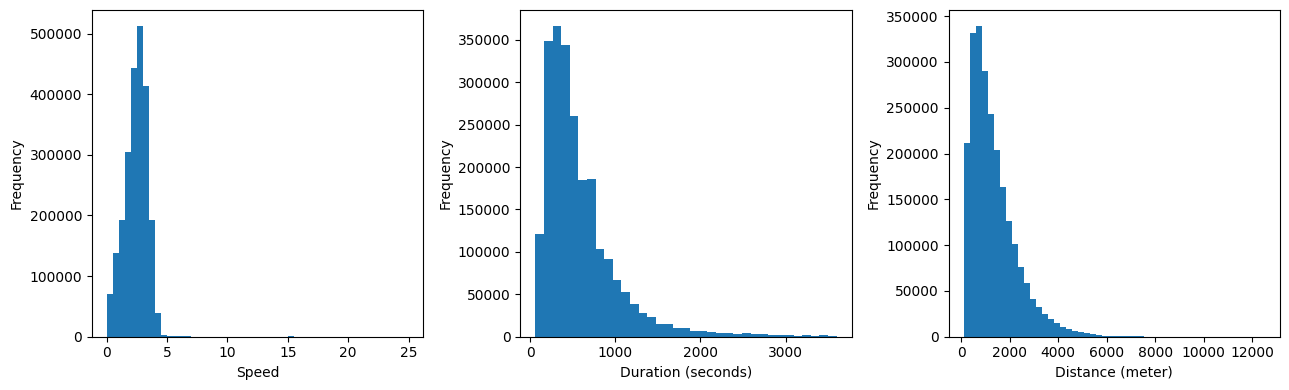

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

axes[0].hist(data['speed'], bins=50)
axes[0].set_xlabel('Speed')
axes[0].set_ylabel('Frequency')

axes[1].hist(data['duration'], bins=35) 
axes[1].set_xlabel('Duration (seconds)')
axes[2].set_ylabel('Frequency')

data['distance'] = pd.to_numeric(data['distance'], errors='coerce')
axes[2].hist(data['distance'], bins=50)
axes[2].set_xlabel('Distance (meter)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

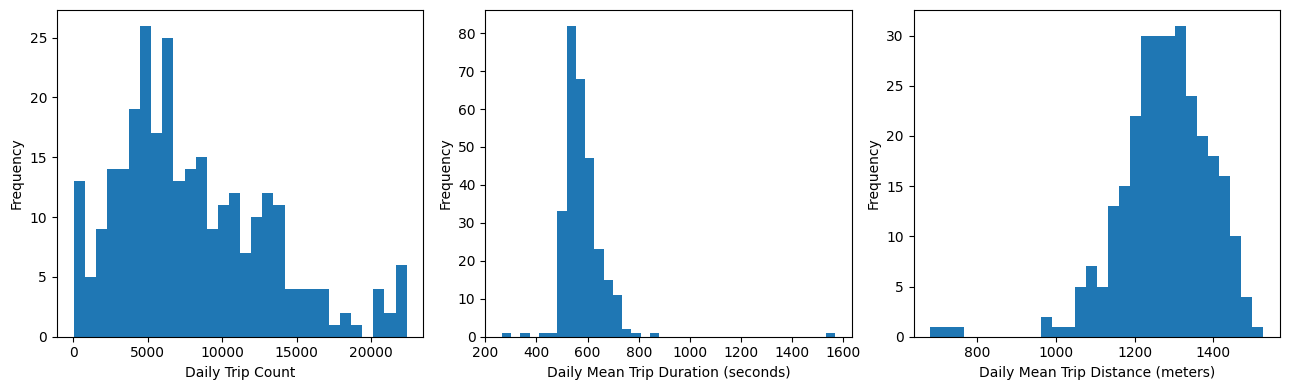

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
data['Dated'] = data['o_time'].dt.strftime('%Y-%m-%d')

# Daily trip count
daily_trip_count = data.groupby('Dated').size()
axes[0].hist(daily_trip_count, bins=30)
axes[0].set_xlabel('Daily Trip Count')
axes[0].set_ylabel('Frequency')

# Daily mean trip duration
daily_mean_trip_duration = data.groupby('Dated')['duration'].mean()
axes[1].hist(daily_mean_trip_duration, bins=36)
axes[1].set_xlabel('Daily Mean Trip Duration (seconds)')
axes[1].set_ylabel('Frequency')

# Daily trip distance
daily_trip_distance = data.groupby('Dated')['distance'].mean()
axes[2].hist(daily_trip_distance, bins=30)
axes[2].set_xlabel('Daily Mean Trip Distance (meters)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2319714 entries, 0 to 2320249
Data columns (total 12 columns):
 #   Column    Dtype         
---  ------    -----         
 0   o_time    datetime64[ns]
 1   o_lat     float64       
 2   o_lng     float64       
 3   hour      int32         
 4   month     object        
 5   date      int32         
 6   duration  float64       
 7   weekday   object        
 8   distance  float64       
 9   geometry  geometry      
 10  speed     float64       
 11  Dated     object        
dtypes: datetime64[ns](1), float64(5), geometry(1), int32(2), object(3)
memory usage: 212.4+ MB


In [15]:
data.head()

,o_time,o_lat,o_lng,hour,month,date,duration,weekday,distance,geometry,speed,Dated
0,2022-01-01 00:00:08,59.335075,18.077610,0,Jan,1,722.0,Sat,104.42,POINT (18.07761 59.33508),0.144626,2022-01-01
1,2022-01-01 00:00:08,59.319855,18.056231,0,Jan,1,181.0,Sat,102.28,POINT (18.05623 59.31985),0.565083,2022-01-01
2,2022-01-01 00:03:09,59.318787,18.049023,0,Jan,1,722.0,Sat,1432.92,POINT (18.04902 59.31879),1.984654,2022-01-01
3,2022-01-01 00:03:09,59.295151,18.085575,0,Jan,1,361.0,Sat,443.30,POINT (18.08558 59.29515),1.227978,2022-01-01
4,2022-01-01 00:03:09,59.328869,18.076910,0,Jan,1,903.0,Sat,1463.26,POINT (18.07691 59.32887),1.620443,2022-01-01


# Season and week

In [16]:
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
data['month_num'] = pd.to_numeric(data['month'].map(month_mapping), errors='coerce').fillna(0).astype(int)
print('NoMonth', (data['month_num']< 1).sum())

NoMonth 0


In [17]:
data.head()

,o_time,o_lat,o_lng,hour,month,date,duration,weekday,distance,geometry,speed,Dated,month_num
0,2022-01-01 00:00:08,59.335075,18.077610,0,Jan,1,722.0,Sat,104.42,POINT (18.07761 59.33508),0.144626,2022-01-01,1
1,2022-01-01 00:00:08,59.319855,18.056231,0,Jan,1,181.0,Sat,102.28,POINT (18.05623 59.31985),0.565083,2022-01-01,1
2,2022-01-01 00:03:09,59.318787,18.049023,0,Jan,1,722.0,Sat,1432.92,POINT (18.04902 59.31879),1.984654,2022-01-01,1
3,2022-01-01 00:03:09,59.295151,18.085575,0,Jan,1,361.0,Sat,443.30,POINT (18.08558 59.29515),1.227978,2022-01-01,1
4,2022-01-01 00:03:09,59.328869,18.076910,0,Jan,1,903.0,Sat,1463.26,POINT (18.07691 59.32887),1.620443,2022-01-01,1


In [18]:
data['count_trip']=1
month_to_season = {12: 'Winter', 1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
                   6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall' }

data['season'] = data['month_num'].map(month_to_season)
daily_trip_counts = data.groupby(['season', 'weekday','Dated'])['count_trip'].sum().reset_index()   #288 days
daily_average_trip_count = daily_trip_counts.groupby('season')['count_trip'].mean()

yearly_daily_average_trip_count = daily_trip_counts['count_trip'].mean()
Percent_trips_season = (daily_average_trip_count-daily_trip_counts['count_trip'].mean())/daily_average_trip_count *100

print("Average daily trip count for 2022:\t", yearly_daily_average_trip_count.astype(int))
print("Average daily trip counts for Winter:\t", daily_average_trip_count['Winter'].astype(int), '\t', Percent_trips_season['Winter'].round(2), '% over yearly daily average')
print("Average daily trip counts for Spring:\t", daily_average_trip_count['Spring'].astype(int),'\t ', Percent_trips_season['Spring'].round(2), '% over yearly daily average')
print("Average daily trip counts for Summer:\t", daily_average_trip_count['Summer'].astype(int),'\t  ', Percent_trips_season['Summer'].round(2), '% over yearly daily average')
print("Average daily trip counts for Fall:\t", daily_average_trip_count['Fall'].astype(int), '\t   ',Percent_trips_season['Fall'].round(2), '% over yearly daily average')

Average daily trip count for 2022:	 8054
Average daily trip counts for Winter:	 3836 	 -109.96 % over yearly daily average
Average daily trip counts for Spring:	 6982 	  -15.36 % over yearly daily average
Average daily trip counts for Summer:	 12477 	   35.45 % over yearly daily average
Average daily trip counts for Fall:	 8196 	    1.73 % over yearly daily average


In [19]:
data['day_cat'] = data['weekday'].apply(lambda x: 'Weekend' if x in ['Sat', 'Sun'] else 'Weekday')

daily_trip_counts = data.groupby(['day_cat', 'weekday'])['Dated'].count()
average_daily_trip_counts = daily_trip_counts.groupby('day_cat').mean()

Percent_trips_weekday = average_daily_trip_counts/average_daily_trip_counts.sum() * 100

print("Total Trip Counts on Weekdays:", average_daily_trip_counts['Weekday'], '\t', Percent_trips_weekday['Weekday'].round(2), '%')
print("Total Trip Counts on Weekends:", average_daily_trip_counts['Weekend'], '\t', Percent_trips_weekday['Weekend'].round(2), '%')

Total Trip Counts on Weekdays: 349827.4 	 55.08 %
Total Trip Counts on Weekends: 285288.5 	 44.92 %


In [20]:
data.head()

,o_time,o_lat,o_lng,hour,month,date,duration,weekday,distance,geometry,speed,Dated,month_num,count_trip,season,day_cat
0,2022-01-01 00:00:08,59.335075,18.077610,0,Jan,1,722.0,Sat,104.42,POINT (18.07761 59.33508),0.144626,2022-01-01,1,1,Winter,Weekend
1,2022-01-01 00:00:08,59.319855,18.056231,0,Jan,1,181.0,Sat,102.28,POINT (18.05623 59.31985),0.565083,2022-01-01,1,1,Winter,Weekend
2,2022-01-01 00:03:09,59.318787,18.049023,0,Jan,1,722.0,Sat,1432.92,POINT (18.04902 59.31879),1.984654,2022-01-01,1,1,Winter,Weekend
3,2022-01-01 00:03:09,59.295151,18.085575,0,Jan,1,361.0,Sat,443.30,POINT (18.08558 59.29515),1.227978,2022-01-01,1,1,Winter,Weekend
4,2022-01-01 00:03:09,59.328869,18.076910,0,Jan,1,903.0,Sat,1463.26,POINT (18.07691 59.32887),1.620443,2022-01-01,1,1,Winter,Weekend


In [21]:
data['o_times'] = data['o_time'].dt.strftime('%Y-%m-%d %H:%M:%S')
data['seasons'] = data['season'].astype(str)
data['day_cats'] = data['day_cat'].astype(str)
data.drop(columns=['o_time', 'month_num','count_trip','season','day_cat']).to_file('Go_2022.shp', index=False)
data.drop(columns=['o_times','seasons','day_cats'], inplace=True)

## Long-distance trips

In [22]:
sorted_distances = data['distance'].sort_values(ascending=False)
# The trip distance threshold for long-distance trips (1% percentile)
sorted_distances.quantile(0.99)

4607.388700000001

Assuming long trips to be over 5km long..

- When are the long distance trips being generated?
- How much distance do the long distance trips travel?

In [23]:
long_distance_trips = data[data['distance'] >= 5000]

total_trips = long_distance_trips.shape[0]
print("Total trips with trip distance above the threshold: ", total_trips)

Total trips with trip distance above the threshold:  14518


In [24]:
night_long_distance_trips = data[(data['distance'] >= 5000) & (data['hour'] >= 0) & (data['hour'] <= 5)]
mean_trip_counts = night_long_distance_trips['distance'].count()
print("Mean trip counts for long-distance trips during the night times: ", mean_trip_counts,'\t\t',(mean_trip_counts/total_trips *100).round(2),'%')

evening_long_distance_trips = data[(data['distance'] >= 5000) & (data['hour'] >= 18) & (data['hour'] <= 23)]
mean_trip_counts = evening_long_distance_trips['distance'].count()
print("Mean trip counts for long-distance trips during the evening times: ", mean_trip_counts,'\t',(mean_trip_counts/total_trips *100).round(2),'%')

afternoon_long_distance_trips = data[(data['distance'] >= 5000) & (data['hour'] >= 12) & (data['hour'] <= 18)]
mean_trip_counts = afternoon_long_distance_trips['distance'].count()
print("Mean trip counts for long-distance trips during the afternoon times: ", mean_trip_counts,'\t',(mean_trip_counts/total_trips *100).round(2),'%')

morning_long_distance_trips = data[(data['distance'] >= 5000) & (data['hour'] >= 6) & (data['hour'] <= 12)]
mean_trip_counts = morning_long_distance_trips['distance'].count()
print("Mean trip counts for long-distance trips during the morning times: ", mean_trip_counts,'\t',(mean_trip_counts/total_trips *100).round(2),'%')

Mean trip counts for long-distance trips during the night times:  1275 		 8.78 %
Mean trip counts for long-distance trips during the evening times:  3539 	 24.38 %
Mean trip counts for long-distance trips during the afternoon times:  6932 	 47.75 %
Mean trip counts for long-distance trips during the morning times:  4344 	 29.92 %


In [25]:
ld_trips = data[data['distance'] >= 5000]
ldtrip = ld_trips.groupby(['hour', 'day_cat','season'])['count_trip'].sum().reset_index()
ndist = ld_trips.groupby(['hour', 'day_cat','season'])['distance'].mean().reset_index()
ldtrip['distance'] = ndist['distance'].fillna(0)
ldtrip.head()

,hour,day_cat,season,count_trip,distance
0,0,Weekday,Fall,24,6191.085833
1,0,Weekday,Spring,13,5943.023077
2,0,Weekday,Summer,139,5792.360288
3,0,Weekday,Winter,5,5492.158000
4,0,Weekend,Fall,29,5907.218966


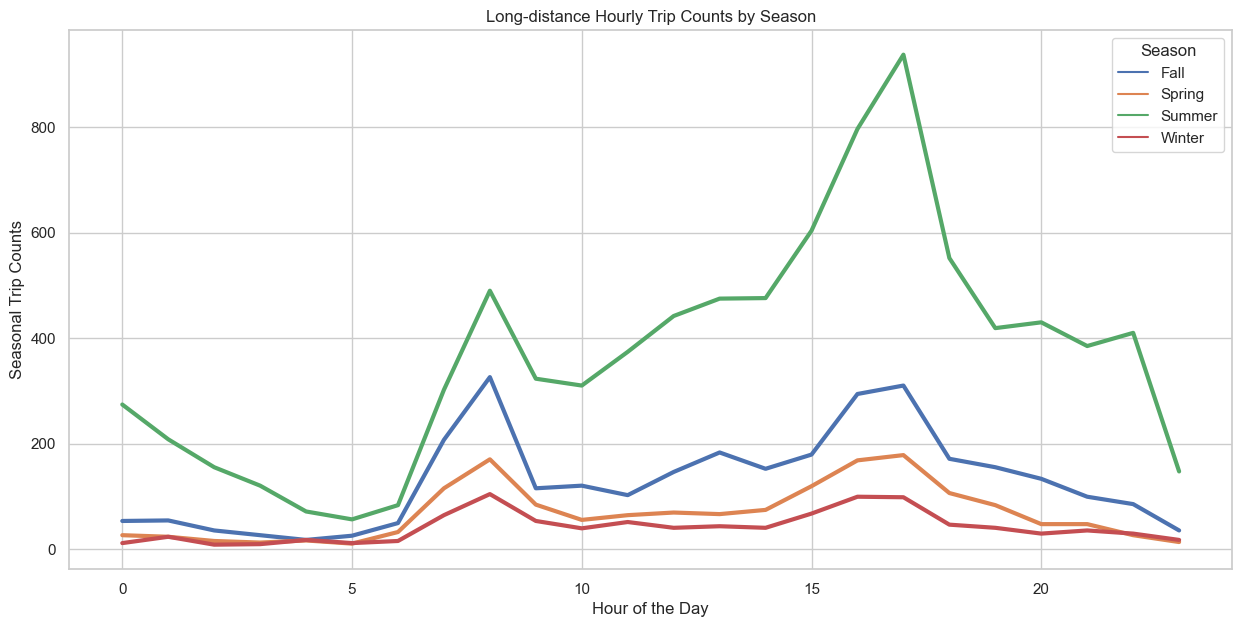

In [26]:
# Long-distance trips: Hourly number of trips variation per season

sns.set(style="whitegrid")
hourly_trip_counts = ldtrip.groupby(['hour', 'season'])['count_trip'].sum().reset_index()
plt.figure(figsize=(15, 7))

sns.lineplot(x='hour', y='count_trip', hue='season', data=hourly_trip_counts, estimator='mean', linewidth=3)
plt.xlabel('Hour of the Day')
plt.ylabel('Seasonal Trip Counts')
plt.title('Long-distance Hourly Trip Counts by Season')
plt.legend(title='Season')
plt.show()

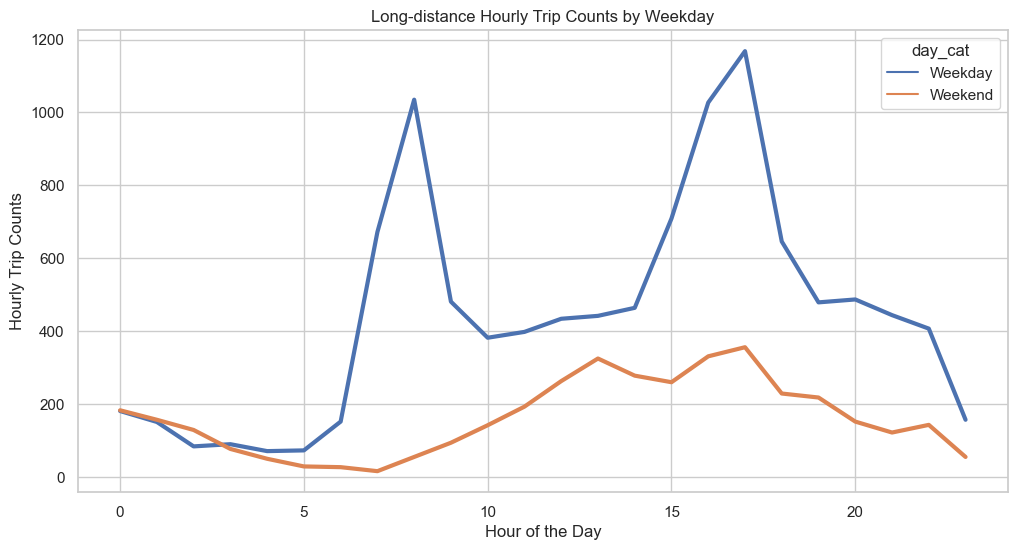

In [27]:
# Long-distance trips: Temporal distribution of trips for weekdays

hourly_trip_counts = ldtrip.groupby(['hour', 'day_cat'])['count_trip'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='count_trip', hue='day_cat', data=hourly_trip_counts, estimator='mean', ci=None, linewidth=3)
plt.xlabel('Hour of the Day')
plt.ylabel('Hourly Trip Counts')
plt.title('Long-distance Hourly Trip Counts by Weekday')
plt.show()

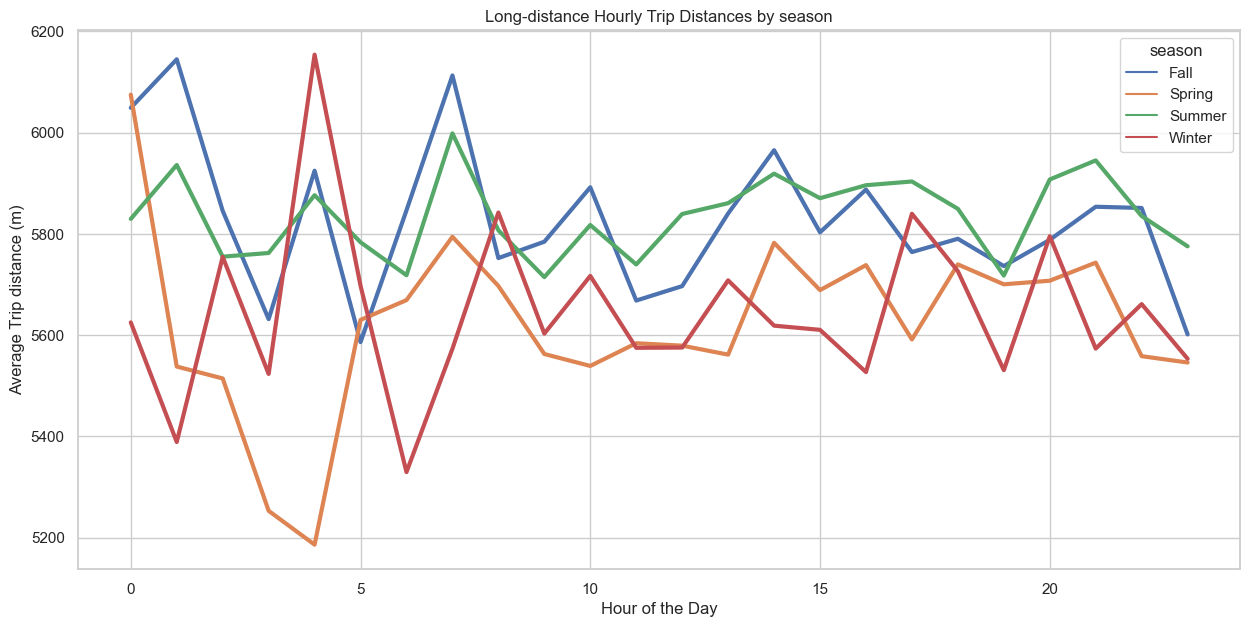

In [28]:
# Long-distance trips: Average trip distances hourly-seasonal

hourly_trip_dist = ldtrip.groupby(['hour', 'season'])['distance'].mean().reset_index()
plt.figure(figsize=(15, 7))
sns.lineplot(x='hour', y='distance', hue='season', data=hourly_trip_dist, estimator='mean', linewidth=3)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip distance (m)')
plt.title('Long-distance Hourly Trip Distances by season')
plt.show()

In [29]:
ldtrip.describe()

,hour,count_trip,distance
count,191.000000,191.000000,191.000000
mean,11.523560,76.010471,5733.718856
std,6.950821,107.102361,212.022800
min,0.000000,1.000000,5115.547500
25%,5.500000,12.500000,5585.517750
50%,12.000000,30.000000,5747.786131
75%,17.500000,94.500000,5855.744329
max,23.000000,692.000000,6428.485000


## Short-distance trips

In [30]:
# Lets consider trips less than 500m as short distance trips
short_distance_trips = data[data['distance'] <= 500]

total_trips = short_distance_trips.shape[0]
print("Total trips with trip distance below the threshold: ", total_trips)

Total trips with trip distance below the threshold:  403831


In [31]:
night_short_distance_trips = data[(data['distance'] <= 500) & (data['hour'] >= 0) & (data['hour'] <= 5)]
mean_trip_counts = night_short_distance_trips['distance'].count()
print("Mean trip counts for short-distance trips during the night times: ", mean_trip_counts,'\t',(mean_trip_counts/total_trips *100).round(2),'%')

evening_short_distance_trips = data[(data['distance'] <= 500) & (data['hour'] >= 18) & (data['hour'] <= 23)]
mean_trip_counts = evening_short_distance_trips['distance'].count()
print("Mean trip counts for short-distance trips during the evening times: ", mean_trip_counts,'\t',(mean_trip_counts/total_trips *100).round(2),'%')

afternoon_short_distance_trips = data[(data['distance'] <= 500) & (data['hour'] >= 12) & (data['hour'] <= 18)]
mean_trip_counts = afternoon_short_distance_trips['distance'].count()
print("Mean trip counts for short-distance trips during the afternoon times: ", mean_trip_counts,'\t',(mean_trip_counts/total_trips *100).round(2),'%')

morning_short_distance_trips = data[(data['distance'] <= 500) & (data['hour'] >= 6) & (data['hour'] <= 12)]
mean_trip_counts = morning_short_distance_trips['distance'].count()
print("Mean trip counts for short-distance trips during the morning times: ", mean_trip_counts,'\t',(mean_trip_counts/total_trips *100).round(2),'%')

Mean trip counts for short-distance trips during the night times:  53298 	 13.2 %
Mean trip counts for short-distance trips during the evening times:  109990 	 27.24 %
Mean trip counts for short-distance trips during the afternoon times:  187876 	 46.52 %
Mean trip counts for short-distance trips during the morning times:  106003 	 26.25 %


In [32]:
sd_trips = data[data['distance'] <= 500]
sdtrip = sd_trips.groupby(['hour', 'day_cat','season'])['count_trip'].sum().reset_index()
ndist = sd_trips.groupby(['hour', 'day_cat','season'])['distance'].mean().reset_index()
sdtrip['distance'] = ndist['distance'].fillna(0)
sdtrip.head()

,hour,day_cat,season,count_trip,distance
0,0,Weekday,Fall,724,294.554461
1,0,Weekday,Spring,870,284.603207
2,0,Weekday,Summer,5439,231.036819
3,0,Weekday,Winter,518,279.624653
4,0,Weekend,Fall,903,322.085980


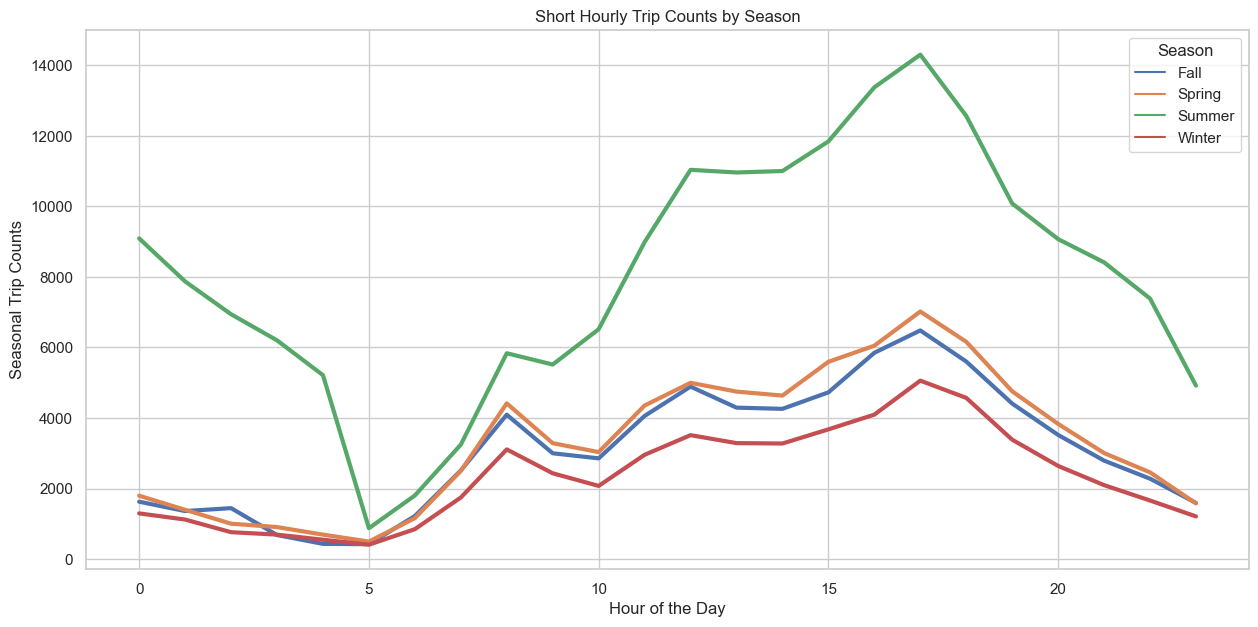

In [33]:
# short-distance trips: Hourly number of trips variation per season

sns.set(style="whitegrid")
hourly_trip_counts = sdtrip.groupby(['hour', 'season'])['count_trip'].sum().reset_index()
plt.figure(figsize=(15, 7))

sns.lineplot(x='hour', y='count_trip', hue='season', data=hourly_trip_counts, estimator='mean', linewidth=3)
plt.xlabel('Hour of the Day')
plt.ylabel('Seasonal Trip Counts')
plt.title('Short Hourly Trip Counts by Season')
plt.legend(title='Season')
plt.show()

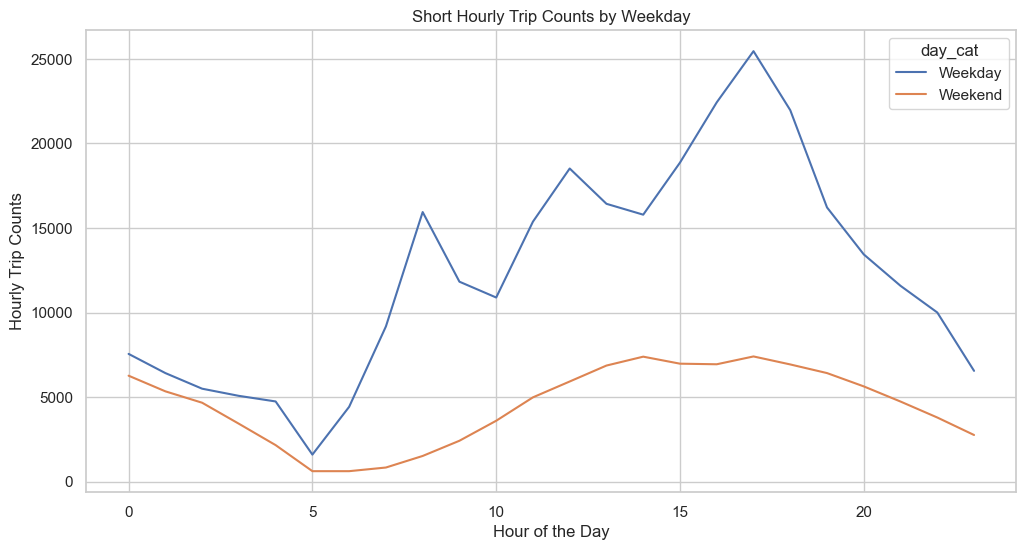

In [34]:
# short-distance trips: Temporal distribution of trips for weekdays

hourly_trip_counts = sdtrip.groupby(['hour', 'day_cat'])['count_trip'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='count_trip', hue='day_cat', data=hourly_trip_counts, estimator='mean', ci=None)
plt.xlabel('Hour of the Day')
plt.ylabel('Hourly Trip Counts')
plt.title('Short Hourly Trip Counts by Weekday')
plt.show()

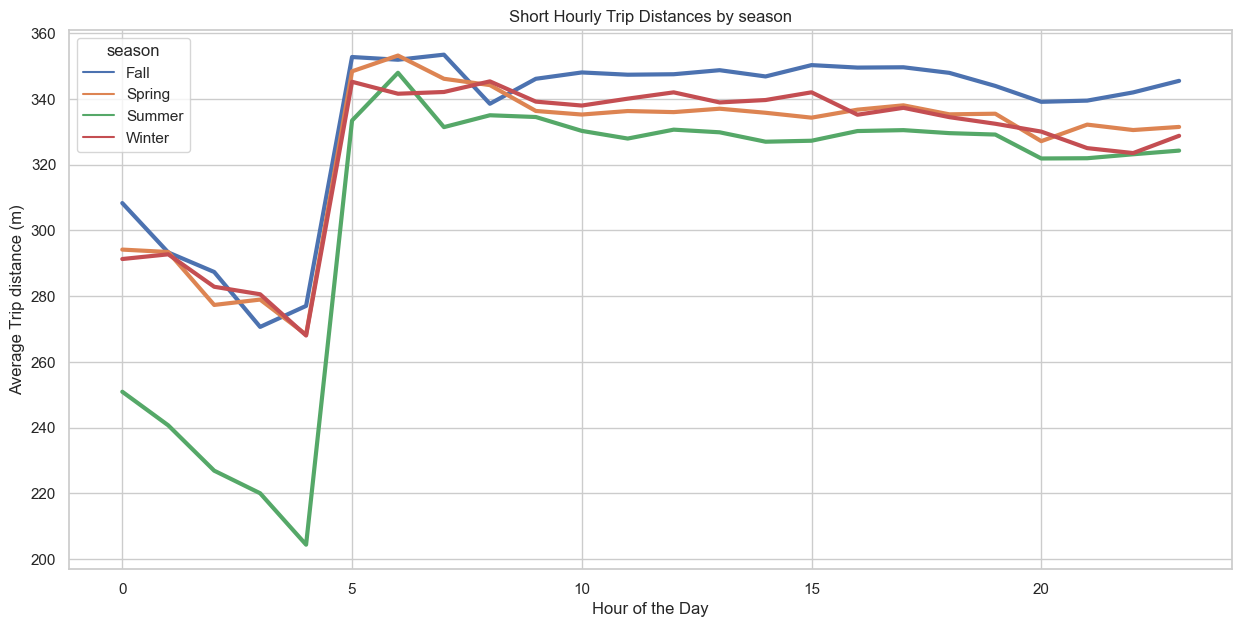

In [35]:
# short-distance trips: Average trip distances hourly-seasonal

hourly_trip_dist = sdtrip.groupby(['hour', 'season'])['distance'].mean().reset_index()
plt.figure(figsize=(15, 7))
sns.lineplot(x='hour', y='distance', hue='season', data=hourly_trip_dist, estimator='mean', linewidth=3)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip distance (m)')
plt.title('Short Hourly Trip Distances by season')
plt.show()

In [36]:
sd_trips.describe()

,o_time,o_lat,o_lng,hour,date,duration,distance,speed,month_num,count_trip
count,403831,403831.000000,403831.000000,403831.000000,403831.000000,403831.000000,403831.000000,403831.000000,403831.000000,403831.0
mean,2022-06-28 21:21:08.958681088,59.331390,18.059678,13.274511,14.942880,324.894768,325.779967,1.542482,6.434404,1.0
min,2022-01-01 00:00:08,59.285023,17.940942,0.000000,1.000000,61.000000,100.000000,0.028730,1.000000,1.0
25%,2022-04-29 15:34:11,59.318073,18.042263,10.000000,8.000000,154.000000,235.490000,0.871733,4.000000,1.0
50%,2022-07-10 17:25:22,59.333979,18.064314,14.000000,14.000000,188.000000,340.430000,1.573084,7.000000,1.0
75%,2022-08-24 06:39:36,59.340782,18.078480,18.000000,22.000000,309.000000,424.560000,2.155987,8.000000,1.0
max,2022-12-20 06:15:10,59.383388,18.173541,23.000000,31.000000,3599.000000,500.000000,8.191639,12.000000,1.0
std,NaN,0.015663,0.032261,6.045260,8.684293,380.161389,114.451638,0.808434,2.734090,0.0


# All Trip count data

In [37]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2319714 entries, 0 to 2320249
Data columns (total 16 columns):
 #   Column      Dtype         
---  ------      -----         
 0   o_time      datetime64[ns]
 1   o_lat       float64       
 2   o_lng       float64       
 3   hour        int32         
 4   month       object        
 5   date        int32         
 6   duration    float64       
 7   weekday     object        
 8   distance    float64       
 9   geometry    geometry      
 10  speed       float64       
 11  Dated       object        
 12  month_num   int32         
 13  count_trip  int64         
 14  season      object        
 15  day_cat     object        
dtypes: datetime64[ns](1), float64(5), geometry(1), int32(3), int64(1), object(5)
memory usage: 274.3+ MB


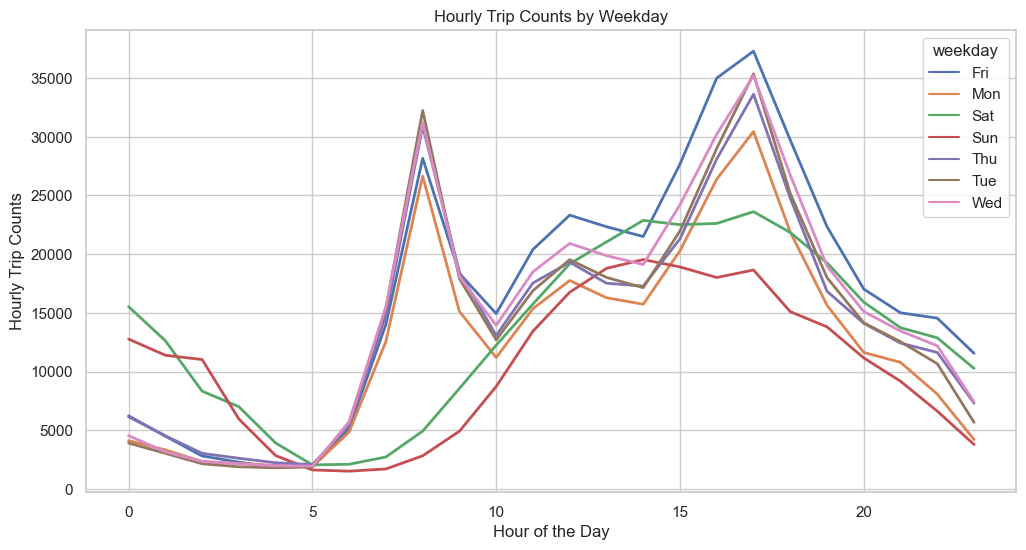

In [38]:
# Temporal distribution of trips for weekdays

hourly_trip_counts = data.groupby(['hour', 'weekday'])['count_trip'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='count_trip', hue='weekday', data=hourly_trip_counts, estimator='mean', ci=None, linewidth=2)
plt.xlabel('Hour of the Day')
plt.ylabel('Hourly Trip Counts')
plt.title('Hourly Trip Counts by Weekday')
plt.show()

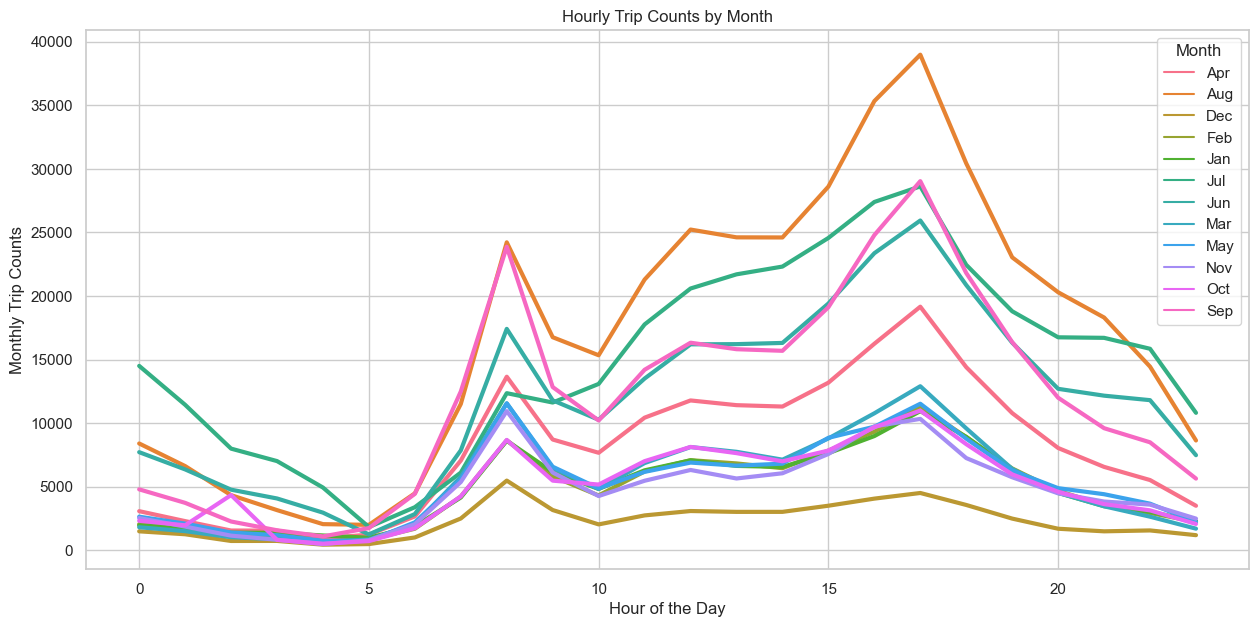

In [39]:
# Hourly number of trips variation per month

hourly_trip_counts = data.groupby(['hour', 'month'])['count_trip'].sum().reset_index()
plt.figure(figsize=(15, 7))
sns.lineplot(x='hour', y='count_trip', hue='month', data=hourly_trip_counts, estimator='mean', linewidth=3)
plt.xlabel('Hour of the Day')
plt.ylabel('Monthly Trip Counts')
plt.title('Hourly Trip Counts by Month')
plt.legend(title='Month')
plt.show()

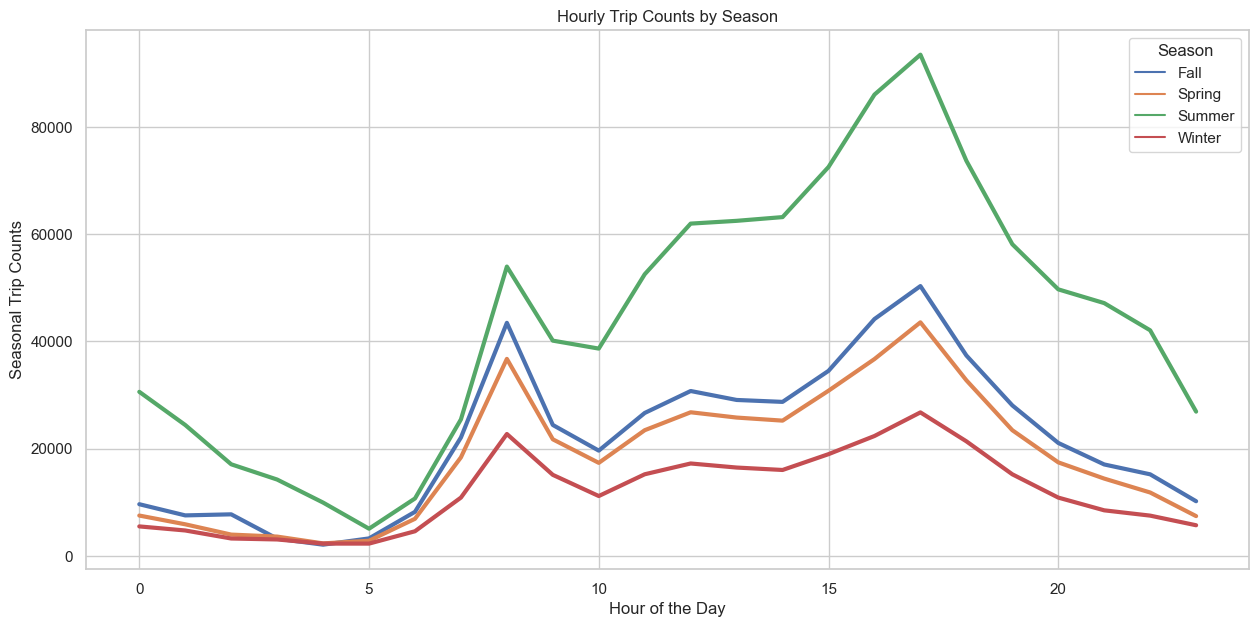

In [40]:
# Hourly number of trips variation per season

sns.set(style="whitegrid")
hourly_trip_counts = data.groupby(['hour', 'season'])['count_trip'].sum().reset_index()
plt.figure(figsize=(15, 7))

sns.lineplot(x='hour', y='count_trip', hue='season', data=hourly_trip_counts, estimator='mean', linewidth=3)
plt.xlabel('Hour of the Day')
plt.ylabel('Seasonal Trip Counts')
plt.title('Hourly Trip Counts by Season')
plt.legend(title='Season')
plt.show()

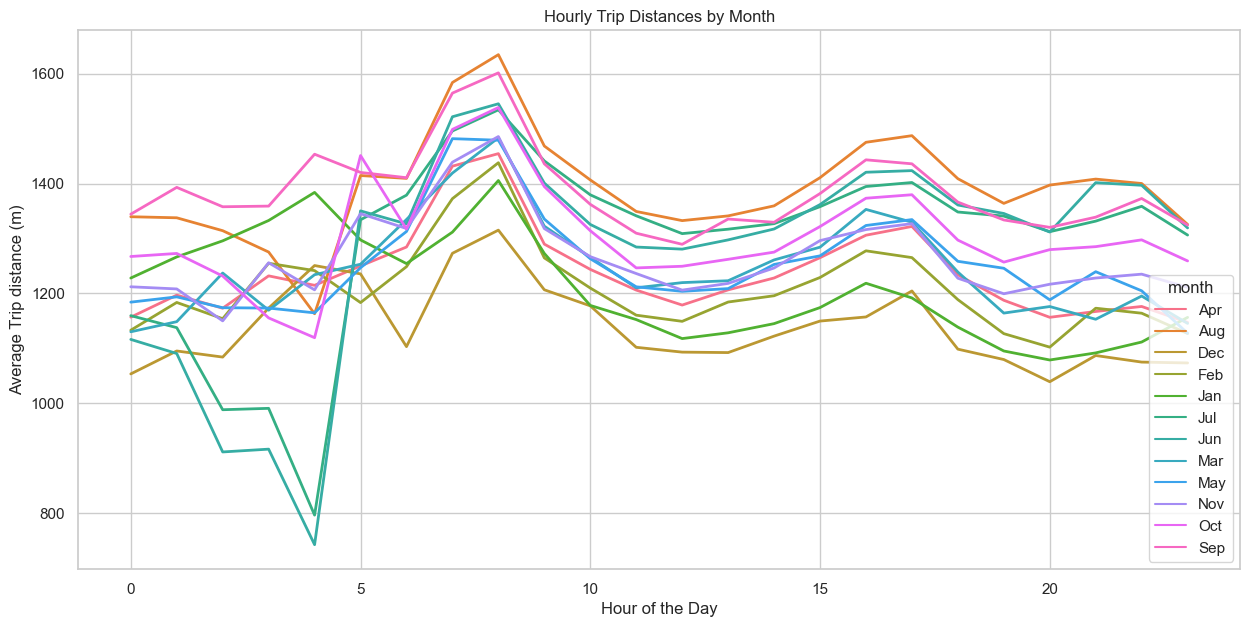

In [41]:
# Average trip distances

hourly_trip_dist = data.groupby(['hour', 'month'])['distance'].mean().reset_index()
plt.figure(figsize=(15, 7))
sns.lineplot(x='hour', y='distance', hue='month', data=hourly_trip_dist, estimator='mean', linewidth=2)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip distance (m)')
plt.title('Hourly Trip Distances by Month')
plt.show()

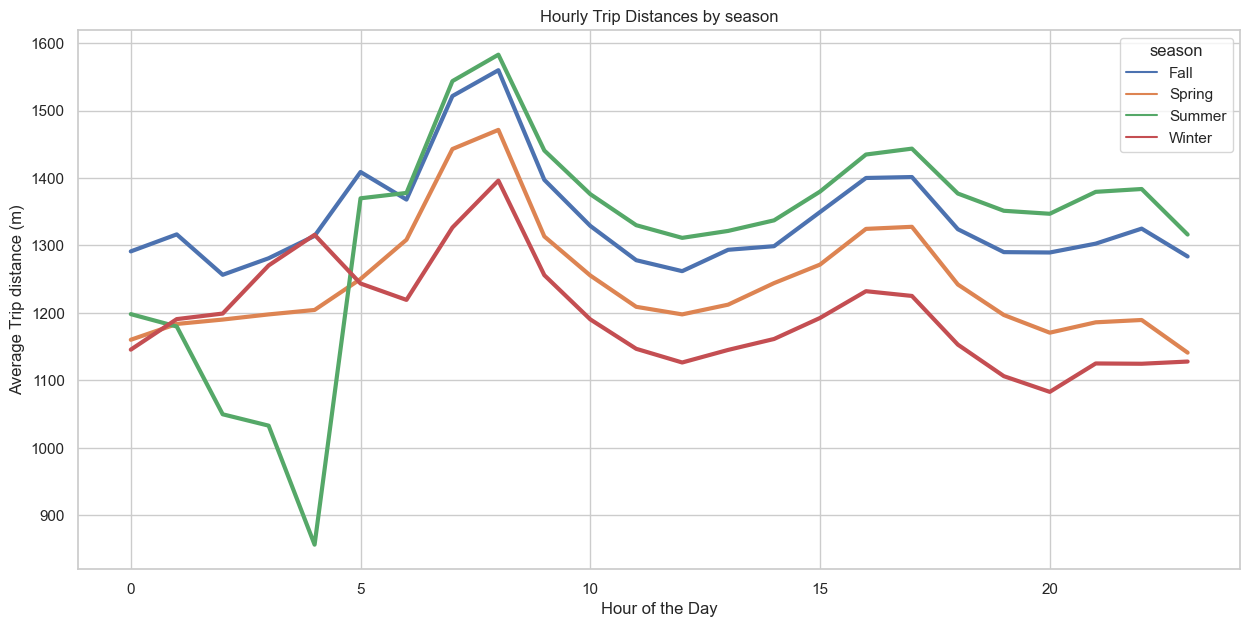

In [42]:
# Average trip distances 

hourly_trip_dist = data.groupby(['hour', 'season'])['distance'].mean().reset_index()
plt.figure(figsize=(15, 7))
sns.lineplot(x='hour', y='distance', hue='season', data=hourly_trip_dist, estimator='mean', linewidth=3)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip distance (m)')
plt.title('Hourly Trip Distances by season')
plt.show()

In [43]:
df3 = data.groupby(['hour','month','weekday'])['distance'].mean().reset_index()
df4 = data.groupby(['hour','month','weekday'])['duration'].mean().reset_index()
df5 = data.groupby(['hour','month','weekday'])['count_trip'].sum().reset_index()
df3['duration'] = df4['duration']
df3['count_trip'] = df5['count_trip']
df3.to_excel('Hour_Week_month.xlsx', index = False)
df3.head()

,hour,month,weekday,distance,duration,count_trip
0,0,Apr,Fri,1184.804598,738.116466,498
1,0,Apr,Mon,1192.309801,889.727575,301
2,0,Apr,Sat,1127.545624,698.890023,882
3,0,Apr,Sun,1102.697196,699.746291,674
4,0,Apr,Thu,1124.195408,685.737160,331


In [44]:
df3[['hour','distance','duration','count_trip']].corr()

,hour,distance,duration,count_trip
hour,1.000000,-0.011525,-0.361082,0.315365
distance,-0.011525,1.000000,0.196110,0.374637
duration,-0.361082,0.196110,1.000000,-0.066123
count_trip,0.315365,0.374637,-0.066123,1.000000
